<a href="https://colab.research.google.com/github/tomersk/learn-python/blob/main/06_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 6.9 Raster and vector operations

So far we studied the use of raster and vector seperately. However, in reality, we need to combine both for our work. Let us do some commonly used combined operations on our data.

We will begin by extracting the raster data at few point locations. Let us first compute NDVI on the same dataset used in the previous section. Let us first install *rasterio* library.

In [9]:
!pip install rasterio #install the required library for this section

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 367 kB/s 


### 6.9.1 Extracting the data from a raster

In [10]:
# import the required library
import matplotlib.pyplot as plt
from google.colab import drive
import rasterio

drive.mount('/content/gdrive')

# read the ndvi data
file_name = "/content/gdrive/My Drive/Colab Notebooks/LearnPython/data/ndvi.tif"
src = rasterio.open(file_name)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
<open DatasetReader name='/content/gdrive/My Drive/Colab Notebooks/LearnPython/data/ndvi.tif' mode='r'>


Let us generate some random coordinates to extract the data. Remember the coordinates should follow the same projection. Please note that here we are generating random location, in a real life case, you might be having location of your interest to extract the data.

BoundingBox(left=76.5, bottom=11.7, right=76.7, top=11.85)


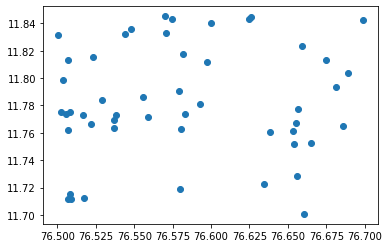

In [17]:
import numpy as np

print(src.bounds)
xmin = src.bounds[0]
ymin = src.bounds[1]
xmax = src.bounds[2]
ymax = src.bounds[3]

coord_x = xmin + (xmax-xmin)*np.random.rand(50) # This is longitude
coord_y = ymin + (ymax-ymin)*np.random.rand(50) # This is latitude

plt.scatter(coord_x, coord_y)
plt.show()

We will be using *rasterio*'s *index* function to convert our xy (longitude and latitude) into row and column for the raster and then extract values.

In [32]:
ndvi_sample = np.empty(len(coord_x),)
for i in range(len(ndvi_sample)):
    x = coord_x[i]
    y = coord_y[i]
    row, col = src.index(x,y)
    ndvi_sample[i] = src.read(1)[row,col]

print(ndvi_sample)

[0.47435898 0.39726028 0.48453608 0.41968912 0.45454547 0.36263737
 0.43209878 0.48453608 0.17127071 0.48387095 0.2923077  0.49685535
 0.34065935 0.44680852 0.2596685  0.15625    0.43589744 0.25106382
 0.5        0.54146343 0.49685535 0.45333335 0.47222221 0.21052632
 0.49044585 0.31753555 0.32075471 0.33953488 0.53374231 0.47019866
 0.47169811 0.48427674 0.34210527 0.33673468 0.4556213  0.17171717
 0.47712418 0.63470322 0.25242719 0.17647059 0.19266056 0.47826087
 0.503268   0.27472529 0.43181819 0.43023255 0.31578946 0.50943398
 0.17171717 0.39712918]


### 6.9.2 Clipping
(need a shapefile to clip)
Clip a raster
